## Diabetes Dataset

이 데이터셋은 환자 442명의 나이, 성별, 10가지 임상 측정값을 포함하고 있습니다.
- ref. https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

---

### Feature(X)

| 컬럼명 | 의미   | 설명      |
|:-------|:-------|:---------- |
| age   | 나이   | 환자의 연령 |
| sex   | 성별   | 남성/여성을 나타내는 이진 값 |
| bmi   | 체질량지수 | 비만도(BMI). 질병 진행도에 큰 영향을 줌 |
| bp    | 평균 혈압 | 평균 혈압 |
| s1    | TC     | 총 콜레스테롤 수치 관련 지표 |
| s2    | LDL    | LDL(Low-Density Lipoproteins) 콜레스테롤 관련 지표 |
| s3    | HDL    | HDL(High-Density Lipopreteins) 콜레스테롤 관련 지표 |
| s4    | TCH비율 | 콜레스테롤 균형을 나타내는 지표 (TC / HDL) |
| s5    | LTG    | 혈중 중성지방(Triglycerides)의 로그값 |
| s6    | GLU    | 혈당 수치 (Blood Glucose Level) |



### Target(y)

| 컬럼명 | 의미 |
|:-----|:-----|
|target|1년 뒤 당뇨 진단 진행 정도 (disease progression)|

In [34]:
from sklearn.datasets import load_diabetes
import pandas as pd

data = load_diabetes(as_frame=True)         # 당뇨병 데이터셋 로드
# * as_frame=True : pandas DataFrame 형태로 바로 변환해줌

df = data.frame                             # 데이터 추출 (독립변수와 종속변수가 모두 포함된 전체 데이터)
# * .frame : 특징(feature) + target 컬럼 모두 포함
# * .data : 특징(feature)만 포함

df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### 데이터 EDA (탐색적 데이터 분석)

- 탐색 단계에서 시각화를 통해 정규 분포를 따르는 지, 이상치가 있는 지 확인
- 사이킷런에서 제공되는 표준 데이터셋
  - 대부분 이미 평균 0, 분산 1로 스케일링 되어 있음

In [35]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [37]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


### Target(당뇨병 진행도) 분포 확인

- 히스토그램을 통해 종속변수(y)가 어떤 형태로 분포되어 있는 지 확인
- 예측 모델의 성능 해석 시 분포 특성을 아는 것이 도움됨

Text(0, 0.5, '샘플 수')

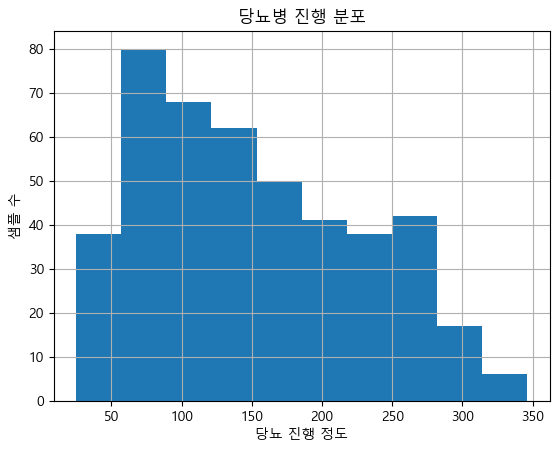

In [38]:
import matplotlib.pyplot as plt

# 한글 폰트 적용
plt.rc('font', family='Malgun Gothic')

# DataFrame.hist() => 데이터 분포 정보를 시각화해주는 함수
df['target'].hist()
plt.title("당뇨병 진행 분포")
plt.xlabel("당뇨 진행 정도")
plt.ylabel("샘플 수")

### BMI (체질량 지수)와 Target(당뇨병 진행도) 간 관계 시각화

- 산점도(Scatter Plot)
  - 두 연속형 변수(x,y)간의 관계를 점들의 집합으로 표현하는 그래프
  - 각 점은 하나의 데이터 샘플을 의미함

- KNN 회귀는 거리 기반 알고리즘으로 이러한 연속 변수의 패턴을 시각적으로 보는 것이 중요함!
- 선형 관계 파악
  - 우상향 그래프 -> 양의 상관 관계
  - 우하향 그래프 -> 음의 상관 관계
  - 아무 패턴 없음 -> 상관 없음

Text(0, 0.5, '당뇨병 진행도')

C:\Users\user1\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
C:\Users\user1\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


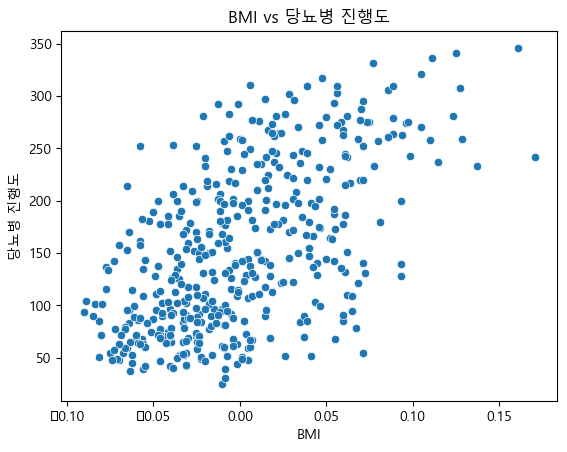

In [39]:
import seaborn as sns

sns.scatterplot(data=df, x='bmi', y='target')
plt.title('BMI vs 당뇨병 진행도')
plt.xlabel('BMI')
plt.ylabel('당뇨병 진행도')

### 특징 간 상관 관계 히트맵

- 어떤 특징이 target과 더 관련이 있어 보이는 지 확인할 때 유용
- 숫자형 변수들끼리의 상관계수를 계산한 후 히트맵으로 시각화
- +1 : 강한 양의 상관 / -1 : 강한 음의 상관 / 0에 가까울수록 관계가 약함(없음)

c:\Users\user1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()


Text(0.5, 1.0, '당뇨 상관 관계 히트맵')

C:\Users\user1\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
C:\Users\user1\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


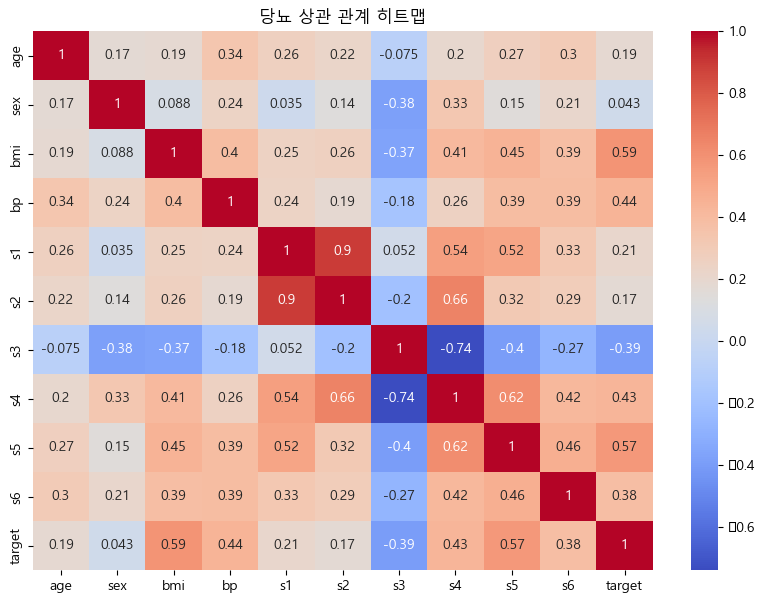

In [40]:
# 상관 관계 히트맵

corr_data = df.corr()   # 상관계수 행렬
plt.figure(figsize=(10, 7))

sns.heatmap(corr_data
            , annot=True        # 각 칸에 숫자 표시 여부(상관계수)
            , cmap='coolwarm')  # color map / coolwarm : 음의 상관-파란색, 양의 상관-붉은색
plt.title("당뇨 상관 관계 히트맵")
# => target과 bmi, s5와 같은 특징들이 높은 상관도를 보이고 있음!

### 독립변수, 종속변수 분리

In [41]:
# 독립변수 (x), 종속변수 (y)
x=df.drop('target', axis=1)   # target 컬럼 제외한 데이터프레임
y=df['target']                # target 컬럼만 선택된 시리즈

# df.loc[:, 'age':'s6'] # 슬라이싱으로 독립변수 추출. 되도록 drop을 사용하자..!
# x
# y

Train/Test 분리

- train:test = 8:2

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### KNN Regression 모델 학습

- k : 5

In [43]:
from sklearn.neighbors import KNeighborsRegressor

# 모델 생성
model = KNeighborsRegressor(n_neighbors=5)

# 학습
model.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### 예측 후 평가 지표 확인

회귀 모델에서 가장 중요하고 일반적으로 사용되는 지표

- R2 (결정계수) : 모델이 예측 성능을 0과 1 사이의 값으로 표시. 1에 가까울수록 모델이 데이터를 잘 설명한 것임.
- MSE (평균 절대 오차) : 실제 값과 예측 값 차이(오차)의 절대값 평균. 
- RMSE (평균 제곱근 오차) : 실제 값과 예측 값 차이(오차)의 제곱 평균에 제곱근을 취한 값.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# 예측
y_pred = model.predict(x_test)

# 결정계수
r2 = r2_score(y_test, y_pred)

print(f'현재 모델의 결정계수 : {r2:.2f}') # 0.43 => 43% 성능. 높지는 않지만 무작위 추측보다는 나은 성능이다..

# MSE
mse = mean_squared_error(y_test, y_pred)
print(f'현재 모델의 MSE : {mse}')
# => MSE 값은 낮을수록 좋은 성능을 가진다고 볼 수 있음.

# RMSE : 오차의 평균적인 크기
rmse = np.sqrt(mse)
print(f'현재 모델의 RMSE : {rmse}') 

현재 모델의 결정계수 : 0.43
현재 모델의 MSE : 3019.075505617978
현재 모델의 RMSE : 54.946114563433675
